In [1]:
""""
Figaro times collection times script. 
"""
import numpy as np
import pandas as pd
import os
from openpyxl import load_workbook, Workbook
from openpyxl.utils.cell import get_column_letter

path_src = "/local/scratch/Figaro/figaro-code"
exp_names = ["figaro", "mkl", "openblas"]
exp_paths = {"figaro": "comparisons/performance/figaro_thin_diag", "mkl": "comparisons/performance/python/mkl", "openblas": "comparisons/performance/python/openblas"}
db_names = ["DBRetailer", "DBFavorita", "DBYelp"]

start_per = 10
end_per = 70
per_inc = 10

num_measurement = 5

xlsx_name = "time.xlsx"

df_measurement_exps = {}
for exp_name in exp_names: 
    exp_path = exp_paths[exp_name]
    perf_path = os.path.join(path_src, exp_path)
    df_measurement = pd.DataFrame(columns=db_names)

    for db_name in db_names:

        for db_idx, percent in enumerate(range(start_per, end_per + 1, per_inc)): 
            db_name_per = "{}{}".format(db_name, percent)
            path_xlsx = os.path.join(perf_path, db_name_per, xlsx_name)
            workbook = load_workbook(filename=path_xlsx, data_only=True)
            sheet = workbook.active
            row_count = sheet.max_row
            col_idx = db_idx + 1
            col_letter = get_column_letter(col_idx)
            
            start_row_idx = 2
            np_measures = np.zeros(num_measurement)
            for row_idx_dst in range(start_row_idx, start_row_idx + num_measurement):
                offset_idx = row_idx_dst - start_row_idx
                row_idx_src = row_count - num_measurement  + offset_idx
                val = sheet.cell(row=row_idx_src, column=2).value
                print(exp_name, db_name, db_name_per, val)
                np_measures[offset_idx] = float(val)

            time_avg = np.mean(np_measures[1:])
            df_measurement.at[percent, db_name] = time_avg
            
        print(df_measurement)
        df_measurement.index = df_measurement.index.set_names(['index'])
        df_measurement = df_measurement.astype(float)
    df_measurement_exps[exp_name] = df_measurement





figaro DBRetailer DBRetailer10 1.072594
figaro DBRetailer DBRetailer10 1.035282
figaro DBRetailer DBRetailer10 0.97197
figaro DBRetailer DBRetailer10 1.025643
figaro DBRetailer DBRetailer10 1.073674
figaro DBRetailer DBRetailer20 1.97139
figaro DBRetailer DBRetailer20 1.94255
figaro DBRetailer DBRetailer20 1.891483
figaro DBRetailer DBRetailer20 1.972559
figaro DBRetailer DBRetailer20 1.951262
figaro DBRetailer DBRetailer30 2.54875
figaro DBRetailer DBRetailer30 2.544207
figaro DBRetailer DBRetailer30 2.571042
figaro DBRetailer DBRetailer30 2.565793
figaro DBRetailer DBRetailer30 2.609786
figaro DBRetailer DBRetailer40 3.566437
figaro DBRetailer DBRetailer40 3.694057
figaro DBRetailer DBRetailer40 3.430826
figaro DBRetailer DBRetailer40 3.640002
figaro DBRetailer DBRetailer40 3.63851
figaro DBRetailer DBRetailer50 4.231835
figaro DBRetailer DBRetailer50 4.608095
figaro DBRetailer DBRetailer50 4.217504
figaro DBRetailer DBRetailer50 4.28143
figaro DBRetailer DBRetailer50 4.306126
figaro

In [2]:
import csv
"""
db_name_map = {
    "DBFavorita": "exp1perf-favorita.dat", 
    "DBRetailer": "exp1perf-retailer.dat", 
    "DBYelp": "exp1perf-yelp.dat"
    }
exp_dat_names = ["#percentage of data", "figaro-time", "mkl-time"]

for db_name in db_names:
    dbs_results = []
    for exp_name in exp_names:
        dbs_results.append(df_measurement_exps[exp_name][db_name])
    df_db_results = pd.concat(dbs_results, axis=1)
    df_db_results = df_db_results.reset_index().rename(columns={df_db_results.index.name:'index'})
    df_db_results.columns = exp_dat_names
    df_db_results.to_csv(db_name_map[db_name], float_format='%.2f', sep='\t', index=False, quoting=csv.QUOTE_NONE,  escapechar=" ")
"""

'\ndb_name_map = {\n    "DBFavorita": "exp1perf-favorita.dat", \n    "DBRetailer": "exp1perf-retailer.dat", \n    "DBYelp": "exp1perf-yelp.dat"\n    }\nexp_dat_names = ["#percentage of data", "figaro-time", "mkl-time"]\n\nfor db_name in db_names:\n    dbs_results = []\n    for exp_name in exp_names:\n        dbs_results.append(df_measurement_exps[exp_name][db_name])\n    df_db_results = pd.concat(dbs_results, axis=1)\n    df_db_results = df_db_results.reset_index().rename(columns={df_db_results.index.name:\'index\'})\n    df_db_results.columns = exp_dat_names\n    df_db_results.to_csv(db_name_map[db_name], float_format=\'%.2f\', sep=\'\t\', index=False, quoting=csv.QUOTE_NONE,  escapechar=" ")\n'

{'figaro':        DBRetailer  DBFavorita    DBYelp
index                                  
10       1.026642    0.699223  0.147289
20       1.939464    1.236902  0.194725
30       2.572707    1.885915  0.213721
40       3.600849    2.406079  0.260373
50       4.353289    3.081479  0.343840
60       5.187860    3.683688  0.304493
70       5.904402    4.618586  0.360571, 'mkl':        DBRetailer  DBFavorita      DBYelp
index                                    
10       6.219828    6.241757   12.908687
20      12.327718   12.497287   25.648822
30      18.367108   19.372536   37.765995
40      24.673490   25.103648   51.133428
50      29.714413   32.156817   74.059574
60      44.133465   39.967715   93.531130
70      53.461560   47.450779  108.430132, 'openblas':        DBRetailer  DBFavorita      DBYelp
index                                    
10       6.039115    6.292222   12.959169
20      12.328809   13.088881   25.454185
30      17.682889   19.140262   40.960591
40      24.708484   

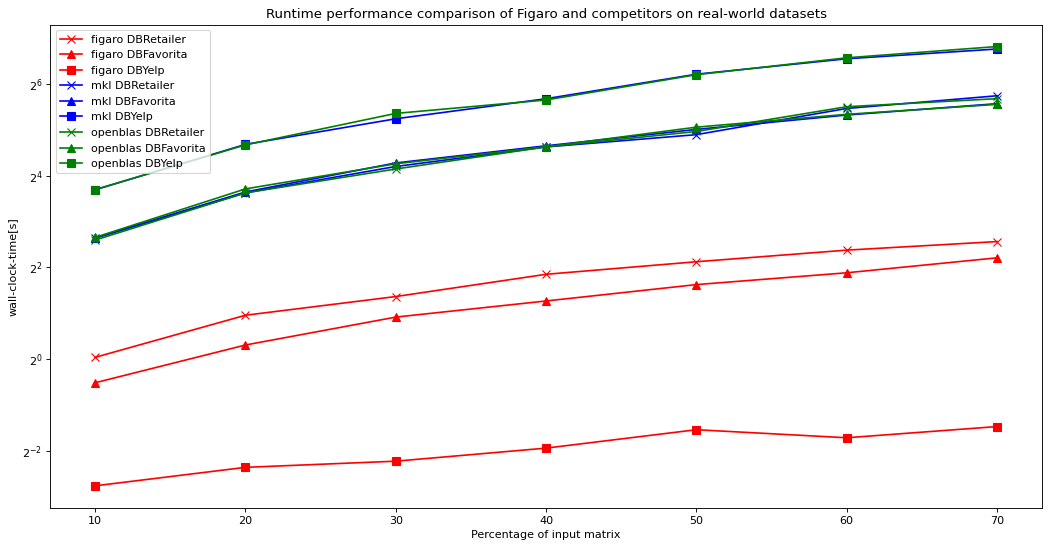

In [3]:
import matplotlib.pyplot as plt

plt.figure("name", figsize=(16, 8), dpi=80)
plt.xlabel("Percentage of input matrix")
plt.ylabel("wall-clock-time[s]")

plt.title("Runtime performance comparison of Figaro and competitors on real-world datasets")

plt.yscale('log', base=2)
plt.locator_params(axis='x', nbins=6)
plt.locator_params(axis='x', nbins=10)
db_marker =  {"DBFavorita": "^", "DBYelp": "s", "DBRetailer": "x"}
exp_colour = {"figaro": "r", "mkl": "b", "openblas": "g"}

print(df_measurement_exps)
for exp_name in exp_names:
    print(exp_name)
    df_measurement = df_measurement_exps[exp_name]
    for db_name in df_measurement:
        print(df_measurement[db_name])
        plt.plot(df_measurement[db_name], "-" + exp_colour[exp_name] + db_marker[db_name], label="{} {}".format(exp_name, db_name), markersize=8)
plt.legend(loc="upper left")

plt.show()